<a href="https://colab.research.google.com/github/the-y-p/DSA/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report

In [ ]:
(x_train, y_train) , (x_test, y_test) = datasets.cifar10.load_data()
x_train.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

In [ ]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [ ]:
y_train = y_train.reshape(-1)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
classes = ["Aeroplane","automobile",'bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
def plot_sample(x, y, index):
  plt.figure(figsize=(4,4))
  plt.imshow(x[index])
  plt.xlabel(classes[y[index]])

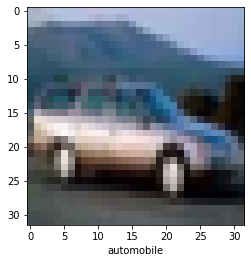

In [ ]:
plot_sample(x_train, y_train , 4)

In [ ]:
x_train = x_train /255.0
x_test = x_test /255.0

In [ ]:
ann = models.Sequential([
      layers.Flatten(input_shape=(32,32,3)),
      layers.Dense(3000, activation='relu'),
      layers.Dense(1000, activation='relu'),
      layers.Dense(10, activation='sigmoid')
])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
ann.fit(x_train, y_train , epochs=5)

Epoch 1/5
 253/1563 [===>..........................] - ETA: 52s - loss: 2.0400 - accuracy: 0.2561

KeyboardInterrupt: ignored

In [ ]:
cnn = models.Sequential([
      #cnn
      layers.Conv2D(filters=16, kernel_size=(3,3), activation = 'relu'),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(filters=32, kernel_size=(3,3), activation = 'relu'),
      layers.MaxPooling2D((2,2)),

      layers.Conv2D(filters=64, kernel_size=(3,3), activation = 'relu'),
      layers.MaxPooling2D((2,2)),
      #dense
      layers.Flatten(),
      layers.Dense(1000, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(10, activation='softmax')
])


In [ ]:
cnn.compile(optimizer='adam',
            loss='sparse_categorical_crossentropy',
            metrics =['accuracy'])

In [ ]:
cnn.fit(x_train, y_train, epochs=15)

Epoch 1/15
1563/1563 [==============================] - 33s 21ms/step - loss: 1.5728 - accuracy: 0.4208
Epoch 2/15
 434/1563 [=======>......................] - ETA: 23s - loss: 1.2613 - accuracy: 0.5429

KeyboardInterrupt: ignored

In [ ]:
import pickle

In [ ]:
with open('saved_model','wb') as f:
  pickle.dump(cnn,f)

INFO:tensorflow:Assets written to: ram://cc3d9273-c8ca-4c26-a9d3-11c246108526/assets


In [ ]:
with open('saved_model','rb') as f:
  mp = pickle.load(f)

In [ ]:
mp.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.2626 - accuracy: 0.6883


[1.2626087665557861, 0.6883000135421753]

In [ ]:
cnn.evaluate(x_test,y_test)

313/313 [==============================] - 3s 8ms/step - loss: 1.2223 - accuracy: 0.5651


[1.2222940921783447, 0.5651000142097473]

In [ ]:
y_test=y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

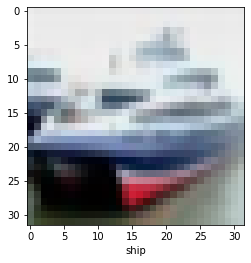

In [ ]:
plot_sample(x_test,y_test,1)

In [ ]:
y_pred = mp.predict(x_test)
y_pred[:5]

array([[4.9846716e-05, 6.7540052e-05, 2.6000028e-03, 7.8081995e-01,
        2.4382118e-04, 2.0519286e-01, 1.0291982e-02, 4.9497216e-05,
        6.6131057e-04, 2.3218223e-05],
       [1.9931465e-03, 3.9889455e-01, 1.9165622e-10, 4.3861842e-10,
        7.4915643e-11, 8.2802681e-11, 2.2489820e-10, 1.9930568e-11,
        5.9890020e-01, 2.1206557e-04],
       [1.9294103e-03, 2.3191258e-02, 1.5986892e-05, 3.0598545e-05,
        1.8993406e-06, 2.0226630e-06, 1.0243346e-05, 8.0193877e-06,
        2.5914630e-02, 9.4889599e-01],
       [9.9860841e-01, 5.4506359e-07, 4.8137026e-05, 8.2753667e-07,
        1.7496129e-04, 2.7068362e-08, 3.0034157e-06, 2.2108161e-07,
        1.1601378e-03, 3.6777108e-06],
       [5.5878284e-09, 4.1105582e-06, 7.4955198e-05, 3.9877828e-02,
        6.9243666e-03, 2.2551406e-04, 9.5289260e-01, 1.8461655e-07,
        3.9830957e-07, 6.7670953e-08]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 9, 0, 6]

In [ ]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

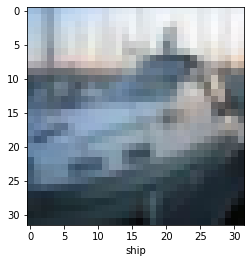

In [ ]:
plot_sample(x_test,y_test,2)

In [ ]:
classes[y_classes[2]]

'truck'

In [ ]:
print("Classification Report : \n ", classification_report(y_test,y_classes))

Classification Report : 
                precision    recall  f1-score   support

           0       0.80      0.65      0.72      1000
           1       0.79      0.82      0.81      1000
           2       0.61      0.56      0.59      1000
           3       0.51      0.46      0.49      1000
           4       0.68      0.58      0.62      1000
           5       0.55      0.66      0.60      1000
           6       0.74      0.78      0.76      1000
           7       0.69      0.75      0.72      1000
           8       0.77      0.83      0.80      1000
           9       0.76      0.78      0.77      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000



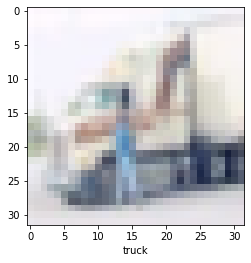

Predicted output : truck
total-time : 3.9904 s


In [7]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import pickle
import random
import os
import numpy as np
import time
from sklearn.metrics import confusion_matrix, classification_report



def plot_sample(x, y, index):
  classes = ["Aeroplane", "automobile", 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
  plt.figure(figsize=(4,4))
  plt.imshow(x[index])
  plt.xlabel(classes[int(y[index])])
  plt.show()

def is_model_saved():
  if os.path.isfile('saved_model.h5'):
    with open('saved_model.h5','rb') as f:
      mp = pickle.load(f)
    return mp
  else:
    

    cnn = models.Sequential([
      # cnn
      layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),

      layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),

      layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
      layers.MaxPooling2D((2, 2)),
      # dense
      layers.Flatten(),
      layers.Dense(1000, activation='relu'),
      layers.Dense(100, activation='relu'),
      layers.Dense(10, activation='softmax')
    ])

    cnn.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

    cnn.fit(x_train, y_train, epochs=15)

    with open('saved_model.h5','wb') as f:
      pickle.dump(cnn,f)
    return cnn


def pred(x_test,y_test,index):
  start = time.time()
  model = is_model_saved()
  y_test = y_test.reshape(-1)
  y_pred = model.predict(x_test)
  y_classes = [np.argmax(element) for element in y_pred]
  plot_sample(x_test,y_test,index)
  print("Predicted output : "+classes[y_classes[index]])
  end = time.time()
  print("total-time : {:.4f} s".format(abs(end-start)))

if __name__ == '__main__':
  (x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

  y_train = y_train.reshape(-1)
  x_train = x_train / 255.0
  x_test = x_test / 255.0

  classes = ["Aeroplane", "automobile", 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

  pred(x_test,y_test,random.randint(0,9999))



In [ ]:
import pandas as pd

import numpy as np

s = pd.Series(np.random.randn(4))

print(s.ndim)

1
